# ACRM Project

In [76]:
# import the packages
import pandas as pd
import numpy as np

import datetime
import matplotlib.pyplot as plt

import seaborn as sns

# 1. Import Data

In [77]:
# import the data into pandas dataframes
hvc_am0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AM0.csv", sep=";")
hvc_ar0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_AR0.csv", sep=";")
hvc_customer_reviews = pd.read_csv("../ACRM-GROUP-13/data/HVC_CUSTOMER_REVIEWS.csv", sep=";")
hvc_depot = pd.read_csv("../ACRM-GROUP-13/data/HVC_DEPOT.csv", sep=";")
hvc_hvdayofweek = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVDAYOFWEEK.csv", sep=";")
hvc_hvposition = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVPOSITION.csv", sep=";")
hvc_hvroutetemplate = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVROUTETEMPLATE.csv", sep=";")
hvc_hvvisitoutcome = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITOUTCOME.csv", sep=";")
hvc_hvvisitresult = pd.read_csv("../ACRM-GROUP-13/data/HVC_HVVISITRESULT.csv", sep=";")
hvc_so0 = pd.read_csv("../ACRM-GROUP-13/data/HVC_SO0.csv", sep=";")
hvc_visitresultdetails = pd.read_csv("../ACRM-GROUP-13/data/HVC_VISITRESULTDETAILS.csv", sep=";")

In [78]:
#Data conversion
hvc_hvdayofweek["HVDAYOFWEEK_NRID"] = hvc_hvdayofweek["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"] = hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvroutetemplate["HVDAYOFWEEK_NRID"] = hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].astype(int)
hvc_hvroutetemplate["WEEKORDER"] = hvc_hvroutetemplate["WEEKORDER"].astype(int)
hvc_hvvisitoutcome["HVOUTCOME_NRID"] = hvc_hvvisitoutcome["HVOUTCOME_NRID"].astype(int)
hvc_visitresultdetails["HVVISITRESULT_NRID"] = hvc_visitresultdetails["HVVISITRESULT_NRID"].astype(int)
hvc_so0["SO0_NRID"] = hvc_so0["SO0_NRID"].astype(int)
hvc_so0["HVROUTETEMPLATE_NRID"] = hvc_so0["HVROUTETEMPLATE_NRID"].astype(int)
hvc_hvvisitresult["DATEONLY"] = pd.to_datetime(hvc_hvvisitresult["DATEONLY"])
hvc_hvvisitresult["VISITDATE"] = pd.to_datetime(hvc_hvvisitresult["VISITDATE"])

# 2. Explore the data

## 2.1 Data Set 1 (hvc_am0 + hvc_ar0 + hvc_customer_reviews) -> Wouter

### 2.1.1 hvc_am0 (employees)

In [79]:
# inspect table
hvc_am0

,AM0_NRID,EMPLOYEENUMBER,NAME,POSTCODE,LOCATION,LANGUAGE
0,18503611215721,1001.0,BOONE Frederik,2460,Tielen,nl-BE
1,18503612347289,1021.0,JANSSENS Jos,2400,Mol,nl-BE
2,18503612452173,1022.0,LEYSEN Michiel,3500,Hasselt,nl-BE
3,18503621528962,1122.0,ALLEMAN Benny,3900,Overpelt,nl-BE
4,18503622652855,1135.0,GOOVAERTS Jef,3920,Lommel,nl-BE
5,18503623836544,1149.0,BOCKY Rudi,3512,Stevoort,nl-BE
6,18503624256831,1158.0,BENOIT Benny,3500,Hasselt,nl-BE
7,18503648417252,507.0,QUINTEN Patrick,3690,Zutendaal,nl-BE
8,18821748667448,2903.0,DE MILT Tomas,2460,Tielen,nl-BE
9,18934048107254,1015.0,VAN HECKE jan,3582,Koersel,nl-BE


In [80]:
# inspect the first 5 observations of the employees
hvc_am0.head(5)

,AM0_NRID,EMPLOYEENUMBER,NAME,POSTCODE,LOCATION,LANGUAGE
0,18503611215721,1001.0,BOONE Frederik,2460,Tielen,nl-BE
1,18503612347289,1021.0,JANSSENS Jos,2400,Mol,nl-BE
2,18503612452173,1022.0,LEYSEN Michiel,3500,Hasselt,nl-BE
3,18503621528962,1122.0,ALLEMAN Benny,3900,Overpelt,nl-BE
4,18503622652855,1135.0,GOOVAERTS Jef,3920,Lommel,nl-BE


In [81]:
# inspect the last 5 observations of the employees
hvc_am0.tail(5)

,AM0_NRID,EMPLOYEENUMBER,NAME,POSTCODE,LOCATION,LANGUAGE
41,24965472608036,NaN,CABOOTER Dries,2460,Tielen,nl-BE
42,25146868694050,3442.0,VERSTRAETE Erik,3920,Lommel,nl-BE
43,25454644465046,3421.0,TACK Hann,2460,Tielen,nl-BE
44,25532744515046,3422.0,PAUWELS Jeffrey,2460,Tielen,nl-BE
45,25712048274438,3426.0,JACOBS Michel,3540,Herk-de-Stad,nl-BE


In [82]:
# check dtypes
hvc_am0.dtypes

AM0_NRID            int64
EMPLOYEENUMBER    float64
NAME               object
POSTCODE            int64
LOCATION           object
LANGUAGE           object
dtype: object

In [83]:
# check the number of employees 
len(hvc_am0)

46

In [84]:
# inspect the total number of missing values for the employeenumber amount
sum(hvc_am0["EMPLOYEENUMBER"].isnull())

6

In [85]:
# inspect some descriptive statistics with respect to the names
hvc_am0["NAME"].describe()

count               46
unique              46
top       JANSSENS Jos
freq                 1
Name: NAME, dtype: object

In [86]:
# inspect some descriptive statistics with respect to the location
hvc_am0["LOCATION"].describe()

count         46
unique        22
top       Tielen
freq          17
Name: LOCATION, dtype: object

In [87]:
# inspect some descriptive statistics with respect to the language
hvc_am0["LANGUAGE"].describe()

count        46
unique        2
top       nl-BE
freq         45
Name: LANGUAGE, dtype: object

### 2.1.2 hvc_ar0 (products)

In [88]:
# inspect table
hvc_ar0

,AR0_NRID,DESCRIPTION,CATEGORY,FAMILY,PRICE
0,20742288286838,Dessert Caramel/14,Verkoopsartikel,Cups,10.9
1,20413488326838,Penalty/16,Verkoopsartikel,Hand Ice,6.5
2,21515648414638,Kriekentaart,Verkoopsartikel,Coffee,7.9
3,20296288686840,Expo met zachte wafel/12,Verkoopsartikel,Individual Dessert,7.3
4,21844652504048,Paaseitjes,Verkoopsartikel,Individual Dessert,7.5
...,...,...,...,...,...
312,23731,Subimba 100 cc.Choc/24,Verkoopsartikel,Cups,9.6
313,23735,Super Krokant/24,Verkoopsartikel,Hand Ice,9.7
314,23739,Maxi Banana/12,Verkoopsartikel,Hand Ice,5.5
315,17492188344852,SoufflÃ© Cointreau/4,Verkoopsartikel,Individual Dessert,8.9


In [89]:
# inspect the first 5 products
hvc_ar0.head(5)

,AR0_NRID,DESCRIPTION,CATEGORY,FAMILY,PRICE
0,20742288286838,Dessert Caramel/14,Verkoopsartikel,Cups,10.9
1,20413488326838,Penalty/16,Verkoopsartikel,Hand Ice,6.5
2,21515648414638,Kriekentaart,Verkoopsartikel,Coffee,7.9
3,20296288686840,Expo met zachte wafel/12,Verkoopsartikel,Individual Dessert,7.3
4,21844652504048,Paaseitjes,Verkoopsartikel,Individual Dessert,7.5


In [90]:
# check dtypes
hvc_ar0.dtypes

AR0_NRID         int64
DESCRIPTION     object
CATEGORY        object
FAMILY          object
PRICE          float64
dtype: object

In [91]:
# inspect some descriptive statistics with respect to the description
hvc_ar0["DESCRIPTION"].describe()

count             317
unique            314
top       Rijstevlaai
freq                2
Name: DESCRIPTION, dtype: object

In [92]:
# inspect some descriptive statistics with respect to the category
hvc_ar0["CATEGORY"].describe()

count                 317
unique                  3
top       Verkoopsartikel
freq                  287
Name: CATEGORY, dtype: object

In [93]:
# inspect some descriptive statistics with respect to the family
hvc_ar0["FAMILY"].describe()

count           275
unique           11
top       Scoop Ice
freq             64
Name: FAMILY, dtype: object

In [94]:
# inspect the total number of products 
len(hvc_ar0["AR0_NRID"].unique())

317

In [95]:
# inspect the proportion of product families
hvc_ar0["FAMILY"].value_counts(normalize=True)

Scoop Ice             0.232727
Hand Ice              0.167273
Cups                  0.134545
Meals                 0.130909
Coffee                0.083636
Ice Cakes             0.083636
Individual Dessert    0.080000
Garniture             0.043636
Assortments           0.029091
POS inside            0.007273
BIG                   0.007273
Name: FAMILY, dtype: float64

In [96]:
# get some descriptive statistics with respect to the price of the products
hvc_ar0["PRICE"].describe()

count    286.000000
mean       7.763112
std        5.948013
min      -25.000000
25%        5.125000
50%        7.600000
75%        9.600000
max       37.000000
Name: PRICE, dtype: float64

In [97]:
# inspect which products had a negative price
hvc_ar0[hvc_ar0["PRICE"] < 0]

,AR0_NRID,DESCRIPTION,CATEGORY,FAMILY,PRICE
21,57367272,"Bon -2,5euro zomermailing07",Kortingsbon,NaN,-2.5
54,54251376,Bon chocolate surprise Utopoli,Kortingsbon,NaN,-5.2
63,62157503,"Bon -7,40 euro",Kortingsbon,NaN,-7.4
64,62315111,Bon duette deluxe/6 bij AK min,Kortingsbon,NaN,-4.2
71,55360457,Bon gratis deco Nieuwsblad/Ver,Kortingsbon,NaN,-4.1
186,21454356698044,"Bon -1,9 euro bij AK 15 euro",Kortingsbon,NaN,-1.9
187,21142456138046,"Bon -4,10euro bij AK van min 2",Kortingsbon,NaN,-4.1
218,52529668,"Bon-6,90euro bij AK van min 35",Kortingsbon,NaN,-7.4
230,53569504,"Bon-3,90euro KVLV 2007",Kortingsbon,NaN,-4.1
231,53614655,Bon -10euro Exellent,Kortingsbon,NaN,-10.0


### 2.1.3 hvc_customer_reviews (reviews)

In [98]:
# inspect table
hvc_customer_reviews

,SO0_NRID,REVIEW
0,719952,"Good service, satisfied"
1,1453609,No opinion
2,1453614,No opinion
3,1453602,"Excellent service, very satisfied"
4,1252497,No opinion
...,...,...
5107,25528089708344,No opinion
5108,25624580427646,No opinion
5109,25616776446438,"Good service, satisfied"
5110,73260813,"Excellent service, very satisfied"


In [99]:
# inspect the first 5 reviews
hvc_customer_reviews.head(5)

,SO0_NRID,REVIEW
0,719952,"Good service, satisfied"
1,1453609,No opinion
2,1453614,No opinion
3,1453602,"Excellent service, very satisfied"
4,1252497,No opinion


In [100]:
# inspect the total number of reviews
len(hvc_customer_reviews["SO0_NRID"].unique())

5112

In [101]:
# checking dtypes
hvc_customer_reviews.dtypes

SO0_NRID     int64
REVIEW      object
dtype: object

In [102]:
# checking kind of reviews
pd.unique(hvc_customer_reviews["REVIEW"])

array(['Good service, satisfied', 'No opinion',
       'Excellent service, very satisfied', 'Not completely satisfied',
       'Very bad service, very unsatisfied'], dtype=object)

In [103]:
# inspect some descriptive statistics with respect to the transaction amount
hvc_customer_reviews["REVIEW"].describe()

count                        5112
unique                          5
top       Good service, satisfied
freq                         2177
Name: REVIEW, dtype: object

In [104]:
# proportion of good or excellent reviews

sum((hvc_customer_reviews["REVIEW"] == "Good service, satisfied") + (hvc_customer_reviews["REVIEW"] == "Excellent service, very satisfied")) / len(hvc_customer_reviews)
    
    


C:\Users\Lenne\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


0.5185837245696401

In [105]:
# proportion of excellent reviews
sum((hvc_customer_reviews["REVIEW"] == "Excellent service, very satisfied")) / len(hvc_customer_reviews)



0.09272300469483569

In [106]:
# proportion of good reviews
sum((hvc_customer_reviews["REVIEW"] == "Good service,  satisfied")) / len(hvc_customer_reviews)

0.0

In [107]:
# proportion of bad reviews
sum((hvc_customer_reviews["REVIEW"] == "Not completely satisfied")) / len(hvc_customer_reviews)

0.08392018779342723

In [108]:
# proportion of terrible reviews
sum((hvc_customer_reviews["REVIEW"] == "Very bad service, very unsatisfied")) / len(hvc_customer_reviews)

0.009780907668231613

## 2.2 Data Set 2 (hvc_depot + hvc_hvdayoftheweek + hvc_hvposition) -> Guillaume

### 2.2.1 hvc_depot

Nog tekstje bijtypen

In [109]:
hvc_depot

,DEPOT_ID,DEPOT,HVROUTETEMPLATE_NRID
0,0,Deinze,219020601
1,1,Deinze,219021241
2,2,Deinze,219024456
3,3,Deinze,219021882
4,4,Deinze,219022524
5,5,Deinze,219023167
6,6,Deinze,219023811
7,7,Deinze,219019324
8,8,Deinze,219019962
9,9,Deinze,289414945


In [110]:
len(hvc_depot)

40

In [111]:
len(hvc_depot["HVROUTETEMPLATE_NRID"].unique())

39

In [112]:
hvc_depot["HVROUTETEMPLATE_NRID"].value_counts()

289656596    2
289658600    1
289655594    1
289761480    1
70671404     1
289660604    1
289659602    1
289762482    1
289419955    1
289759476    1
289664612    1
289416949    1
289756470    1
289413943    1
289663610    1
219020601    1
219021882    1
219022524    1
289657598    1
219019324    1
289661606    1
219023811    1
219018687    1
289764486    1
219024456    1
289418953    1
289758474    1
289755468    1
289412941    1
289662608    1
219021241    1
219019962    1
289763484    1
289760478    1
289417951    1
289757472    1
289414945    1
289411939    1
219023167    1
Name: HVROUTETEMPLATE_NRID, dtype: int64

In [113]:
len(hvc_depot["DEPOT"].unique())

4

In [114]:
hvc_depot["DEPOT"].value_counts()

Vilvoorde    15
Deinze       12
Antwerpen     9
Aarschot      4
Name: DEPOT, dtype: int64

### 2.2.2 hvc_hvdayofweek

In [115]:
hvc_hvdayofweek

,HVDAYOFWEEK_NRID,DAY
0,1,Sunday
1,2,Monday
2,3,Tuesday
3,4,Wednesday
4,5,Thursday
5,6,Friday
6,7,Saturday


### 2.2.3 hvc_hvposition

In [116]:
hvc_hvposition

,SO0_NRID,LONG,LAT
0,724196,3.412928,50.910235
1,724219,3.409088,50.903873
2,724231,3.407691,50.901559
3,724236,3.405464,50.898224
4,724241,3.404218,50.896691
...,...,...,...
5692,25332076406640,3.999738,51.151308
5693,25335568268048,3.680845,50.976083
5694,25343276433048,3.704357,50.917986
5695,25345568238048,3.639243,50.894867


## 2.3 Data Set 3 (hvc_hvroutetemplate + hvc_hvvisitoutcome + hvc_visitresultdetails) -> Mathew

## 2.3.1 hvc_hvroutetemplate

There are 39 different routes that are available. Every route has a unique number. They are available in 4 different regions and are ridden weekly or bi-weekly. 
The rides are on every day of the week except Sunday. 

C04 is the region with the most routes (11), followed by C17 (10) and B25(10) and as last B02(8).

20 of the 39 routes are ridden weekly and the other 19 weekly. 

The Wednesday, Thursday, Friday and Saturday are the most popular days to ride on (8 times out 39 times), followed by Tuesday (6) and Monday (1)


In [117]:
hvc_hvroutetemplate

,HVROUTETEMPLATE_NRID,REGION,WEEKORDER,HVDAYOFWEEK_NRID
0,70671404,C04,1,1
1,219018687,C04,1,2
2,219019324,C04,1,3
3,219019962,C04,1,4
4,219020601,C04,1,5
5,219021241,C04,1,6
6,219021882,C04,2,2
7,219022524,C04,2,3
8,219023167,C04,2,4
9,219023811,C04,2,5


In [118]:
len(hvc_hvroutetemplate)

39

In [119]:
hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].describe()


count    39.000000
mean      4.025641
std       1.459762
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       6.000000
Name: HVDAYOFWEEK_NRID, dtype: float64

In [120]:
hvc_hvroutetemplate["WEEKORDER"].describe()

count    39.000000
mean      1.487179
std       0.506370
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: WEEKORDER, dtype: float64

In [121]:
len(hvc_hvroutetemplate["HVROUTETEMPLATE_NRID"].unique())

39

In [122]:
len(hvc_hvroutetemplate["REGION"].unique())

4

In [123]:
len(hvc_hvroutetemplate["WEEKORDER"].unique())

2

In [124]:
len(hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].unique())

6

In [125]:
hvc_hvroutetemplate["REGION"].value_counts()

C04    11
B25    10
C17    10
B02     8
Name: REGION, dtype: int64

In [126]:
hvc_hvroutetemplate["WEEKORDER"].value_counts()

1    20
2    19
Name: WEEKORDER, dtype: int64

In [127]:
hvc_hvroutetemplate["HVDAYOFWEEK_NRID"].value_counts()

3    8
4    8
5    8
6    8
2    6
1    1
Name: HVDAYOFWEEK_NRID, dtype: int64

## 2.3.2 hvc_hvvisitoutcome

In [128]:
    hvc_hvvisitoutcome

,HVOUTCOME_NRID,DESCRIPTION
0,0,NOTHING NEEDED
1,1,NOT HOME
2,2,SALES


## 2.3.3 hvc_visitresultdetails

There are 126778 unique visits, each with a unique visit ID. 

The average quantity that has been bought is 1.12 goods. There are 75 visits where the quantity is negative, the reason herefore is until now unclear.

In [129]:
hvc_visitresultdetails

,VISITRESULTDETAILS_NRID,AR0_NRID,QUANTITY,HVVISITRESULT_NRID
0,56055671,17545160268040,1.0,56055665
1,56055672,23699,2.0,56055665
2,56055675,23721,1.0,56055674
3,56010656,23714,1.0,56010655
4,56009821,23716,1.0,56009820
...,...,...,...,...
126773,73711114,23782,1.0,73711112
126774,73711115,23761,1.0,73711112
126775,73711116,23816,2.0,73711112
126776,73711554,847901,1.0,73711553


In [130]:
len(hvc_visitresultdetails["VISITRESULTDETAILS_NRID"].unique())

126778

In [131]:
hvc_visitresultdetails["QUANTITY"].describe()

count    126778.000000
mean          1.124335
std           0.689855
min          -6.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          61.000000
Name: QUANTITY, dtype: float64

In [132]:
hvc_visitresultdetails["QUANTITY"].describe()



count    126778.000000
mean          1.124335
std           0.689855
min          -6.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          61.000000
Name: QUANTITY, dtype: float64

In [133]:
visitresultdetails_negative = len(hvc_visitresultdetails[hvc_visitresultdetails["QUANTITY"] < 0])
len(visitresultdetails_negative)

TypeError: object of type 'int' has no len()

In [ ]:
hvc_visitresultdetails["HVVISITRESULT_NRID"] = hvc_visitresultdetails["HVVISITRESULT_NRID"].astype(int)

hvc_visitresultdetails.dtypes

## 2.4 Data Set 4 (hvc_so0_nrid + hvc_resultdetails) -> Lennert

## 2.4.1 Customer information

In [ ]:
# inspect first 5 observations of customers
hvc_so0.head(5)


In [ ]:
# inspect last 5 observations of customers
hvc_so0.tail(5)

In [ ]:
# inspect total number of unique customers
len(hvc_so0["SO0_NRID"].unique())

In [ ]:
# get some descriptive statistics with respect to the spoken language as well as the season type of the customers
hvc_so0[["LANGUAGE", "SEASON_TYPE"]].describe()

In [ ]:
# get the counts for every season type
hvc_so0["SEASON_TYPE"].value_counts()

In [ ]:
# get the counts for every spoken language
hvc_so0["LANGUAGE"].value_counts()

## 2.4.2 Customer Location

In [ ]:
# inspect first 5 observations of customer location
hvc_hvposition.head(5)


In [ ]:
# inspect last 5 observations of customer location
hvc_hvposition.tail(5)

In [ ]:
# total number of locations of unique customers
len(hvc_hvposition["SO0_NRID"].unique())

In [ ]:
#different customers at the same location? More customers then location
len(hvc_hvposition["SO0_NRID"].unique()) == len(hvc_so0["SO0_NRID"].unique())

## 2.4.3 Result of Visit

In [ ]:
# inspect first 5 observations of visit results
hvc_hvvisitresult.head(5)

In [ ]:
# inspect first 5 observations of visit results
hvc_hvvisitresult.tail(5)

In [ ]:
#inspect first 5 observations of customers 
hvc_visitresultdetails.head(5)

In [ ]:
#inspect last 5 observations of customers 
hvc_visitresultdetails.tail(5)

# 3. Answering basic questions

## 3.1 What are the products?


- Does the weather / seasonal changes have an effect on the total revenue?


In [ ]:
# What are the most frequently bought products?
# Bedoelen ze hier frequent als in het meest of hoe moet ik dit zien?
agg_dict = {"QUANTITY": np.sum}
hvc_quantity = hvc_visitresultdetails.groupby("AR0_NRID").agg(agg_dict)
hvc_quantity_top = hvc_quantity.sort_values("QUANTITY", ascending = False).head(5)
hvc_quantity_top
#hvc_test.sort_values(by = ["count"])

In [ ]:
# Which products render the most revenue?
hvc_ar0_visitresultdetails = pd.merge(hvc_ar0, hvc_visitresultdetails)
hvc_ar0_visitresultdetails

revenue = hvc_ar0_visitresultdetails["QUANTITY"] * hvc_ar0_visitresultdetails["PRICE"]
hvc_ar0_visitresultdetails["REVENUE"] = revenue
agg_dict = {"REVENUE": np.sum}
hvc_revenue = hvc_ar0_visitresultdetails.groupby("AR0_NRID").agg(agg_dict)
hvc_revenue_top = hvc_revenue.sort_values("REVENUE", ascending = False).head(5)
hvc_revenue_top

In [ ]:
# Which products are bought the most in the region of Brussels, Antwerp, ...?

hvc_so0_hvroutetemplate = pd.merge(hvc_so0, hvc_hvroutetemplate)

hvc_so0_hvroutetemplate

In [ ]:
# Are product purchases correlated? Are some products often purchased together?

# In table VISITRESULTDETAILS_NRID find the products with the same AR0_NRID. 
# These are the products that are bought in the same visit.

agg_dict = {"AR0_NRID": np.absolute}
hvc_visitresultdetails_correlatedproducts = hvc_visitresultdetails.groupby("HVVISITRESULT_NRID").agg(agg_dict)


hvc_visitresultdetails_correlatedproducts

In [ ]:
len(hvc_visitresultdetails["HVVISITRESULT_NRID"].unique())

In [ ]:
# What are the total sales generated for each product family?

agg_dict = {"REVENUE": np.sum}
hvc_revenue_family = hvc_ar0_visitresultdetails.groupby("FAMILY").agg(agg_dict)
hvc_revenue_family

In [ ]:
# Does the weather / seasonal changes have an effect on the total revenue?

# Merging customer table with visit table on the customer id. 
# Then merging that table with the visitresultdetails on visitid, 
# so now we have a table with the customer that bought something.

hvc_visitresult_visitresultdetails_so0 = pd.merge(pd.merge(hvc_hvvisitresult, hvc_so0, on = "SO0_NRID"), hvc_visitresultdetails, on = "HVVISITRESULT_NRID")

# Now we add what product was bought during that visit by merging on AR0_NRID

hvc_visitresult_visitresultdetails_so0_ar0 = pd.merge(hvc_visitresult_visitresultdetails_so0, hvc_ar0, on = "AR0_NRID")

revenue = hvc_visitresult_visitresultdetails_so0_ar0["QUANTITY"] * hvc_visitresult_visitresultdetails_so0_ar0["PRICE"]
hvc_visitresult_visitresultdetails_so0_ar0["REVENUE"] = revenue

hvc_seasons = hvc_visitresult_visitresultdetails_so0_ar0[["HVVISITRESULT_NRID", "SEASON_TYPE", "REVENUE"]]
hvc_seasons["SEASON_TYPE"].value_counts()

agg_dict = {"REVENUE": np.sum}
hvc_revenue_seasons = hvc_seasons.groupby("SEASON_TYPE").agg(agg_dict)
hvc_revenue_seasons

In [ ]:
# Does the weather / seasonal changes have an effect on the total revenue?

# Merging customer table with visit table on the customer id. 
# Then merging that table with the visitresultdetails on visitid, 
# so now we have a table with the customer that bought something.

hvc_visitresult_visitresultdetails_so0 = pd.merge(pd.merge(hvc_hvvisitresult, hvc_so0, on = "SO0_NRID"), hvc_visitresultdetails, on = "HVVISITRESULT_NRID")

# Now we add what product was bought during that visit by merging on AR0_NRID

hvc_visitresult_visitresultdetails_so0_ar0 = pd.merge(hvc_visitresult_visitresultdetails_so0, hvc_ar0, on = "AR0_NRID")

revenue = hvc_visitresult_visitresultdetails_so0_ar0["AMOUNT"]
hvc_visitresult_visitresultdetails_so0_ar0["REVENUE"] = revenue

hvc_seasons = hvc_visitresult_visitresultdetails_so0_ar0[["HVVISITRESULT_NRID", "SEASON_TYPE", "REVENUE"]]

agg_dict = {"REVENUE": np.sum}
hvc_revenue_seasons = hvc_seasons.groupby("SEASON_TYPE").agg(agg_dict)
hvc_revenue_seasons

In [ ]:
#Check if the customer is visited at the right moment

hvc_hvvisitresult_so0 = pd.merge(hvc_hvvisitresult, hvc_so0)
hvc_hvvisitresult_so0[hvc_hvvisitresult_so0["SEASON_TYPE"] == "Christmas"]


In [ ]:
### Clustering the customer positions

## Clustering the longitude and latitude

from sklearn.cluster import KMeans
plt.figure(figsize = (10,10))

# initialize the cluster algorithm with 4 classes
kmeans_model = KMeans(n_clusters=4)

# fit the kmeans model onto the data
kmeans_model.fit(hvc_hvposition[["LONG","LAT"]])

# get all the cluster labels
cluster_labels = kmeans_model.labels_

# define color map
color_map = {0: "green", 1: "red", 2: "blue", 3: "yellow"}

# get colors for each cluster label
cluster_colors = [color_map[label] for label in cluster_labels]

# plot data with cluster colors
plt.scatter(hvc_hvposition["LONG"], hvc_hvposition["LAT"], color=cluster_colors)
plt.show()

In [ ]:
belgium = gpd.read_file("/Users/wouterdewitte/Desktop/Belgium-Map-1/Arrondissementen.json")
crs = 'epsg:4326'
base = belgium.plot(color='white', edgecolor='black', figsize = (20,20))
gdf = gpd.GeoDataFrame(hvc_hvposition, crs = crs,geometry=gpd.points_from_xy(hvc_hvposition["LONG"], hvc_hvposition["LAT"]))


gdf.plot(ax = base, color = "red",markersize = 10)

plt.show()

In [ ]:
# the map is not precise enough


gdf = gpd.GeoDataFrame(hvc_hvposition, geometry=gpd.points_from_xy(hvc_hvposition["LONG"], hvc_hvposition["LAT"]))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot()
plt.show()

## 3.2 Who are the customers?

### 3.2.1 What do the customers buy?

In [ ]:
customer_id = 721110.0

In [ ]:
# join transactions with transaction details with products
transactions_products = hvc_hvvisitresult.merge(hvc_visitresultdetails, on="HVVISITRESULT_NRID", how="inner")\
                                         .merge(hvc_ar0, on="AR0_NRID", how="inner") 

In [ ]:
# check
transactions_products.head(3)

In [ ]:
# get all the transactions for customer
transactions_products_customer = transactions_products[transactions_products["SO0_NRID"] == customer_id]

# get all transactions with positive outcome
transactions_products_customer = transactions_products_customer[transactions_products_customer["HVOUTCOME_NRID"] == 2]

In [ ]:
# get total number of products bought by the customer
transactions_products_customer["QUANTITY"].sum()

### 3.2.2 Unique list of unique products a customer bought

In [ ]:
# define a function that accepts a customer id, the transactions data, transactions details data and product data
def get_products(cust_id, transactions, transaction_details, products):
    

    # join transactions with transaction details with products
    transactions_products = transactions.merge(transaction_details, on="HVVISITRESULT_NRID", how="inner") \
                                        .merge(products, on="AR0_NRID", how="inner")
    
    # get transactions of customer 
    transactions_products_cust = transactions_products[transactions_products["SO0_NRID"] == cust_id]
    
    # only get transactions of succesfull visits
    transactions_products_cust = transactions_products_cust[transactions_products_cust["HVOUTCOME_NRID"] == 2]
    
    # get total amount of products bought by the customer
    total_products = transactions_products_cust["QUANTITY"].sum()
    
    # get total number of unique products bought by the customer
    total_unique_products = len(transactions_products_cust["DESCRIPTION"].unique())
    
    # return
    return(total_products, total_unique_products)

In [ ]:
# check
get_products(cust_id=721110.0, 
                  transactions=hvc_hvvisitresult, 
                  transaction_details=hvc_visitresultdetails, 
                  products=hvc_ar0)

### 3.2.3 Which customers have the highest CLV?



In [ ]:
def get_clv(cust_id, transactions):
    
    # get customer transactions
    cust_transactions = transactions[transactions["SO0_NRID"] == cust_id]
    # get transactions with positive outcome
    cust_transactions_pos = cust_transactions[cust_transactions["HVOUTCOME_NRID"] == 2]
    # get clv
    clv = np.sum(cust_transactions["AMOUNT"])
    # return clv
    return(clv)

In [ ]:
# check
clv = get_clv(cust_id=721110.0, transactions=hvc_hvvisitresult)
print(clv)

In [144]:
# CLV for private customers
private_cust = hvc_so0[hvc_so0["CUST_TYPE"] == "Private"]


for x in private_cust["SO0_NRID"]:
    clv = get_clv(cust_id=x, transactions=hvc_hvvisitresult)
print(clv)

# CLV 

    

    

0.0


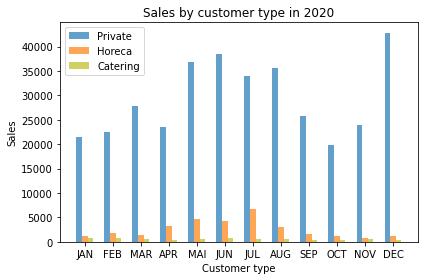

In [136]:
#Sales by customer type 2020
# get the month of each transaction date and store it in new column
hvc_hvvisitresult["MONTH"] = hvc_hvvisitresult["DATEONLY"].apply(lambda x: x.month)

#merge
transactions_2020 = hvc_hvvisitresult.merge(hvc_so0,on="SO0_NRID", how ="inner")

# get transactions from 2020 only
transactions_2020 = transactions_2020[(transactions_2020["DATEONLY"] >= pd.Timestamp(year=2020, day=1, month=1)) & (transactions_2020["DATEONLY"] < pd.Timestamp(year=2021, month=1, day=1))]

# get transactions with succesfull outcome
transactions_2020 = transactions_2020[transactions_2020["HVOUTCOME_NRID"] == 2]


# data to plot 
# get transactions by 'private customers'
private_transactions_2020 = transactions_2020[transactions_2020["CUST_TYPE"] == "Private"]

# get the total sales for each month for 'private customers'
private_monthly_sales = private_transactions_2020.groupby("MONTH")["AMOUNT"].sum().reset_index()

# get transactions by 'Horeca customers'
horeca_transactions_2020 = transactions_2020[transactions_2020["CUST_TYPE"] == "Horeca"]

# get the total sales for each month for 'Horeca customers'
horeca_monthly_sales = horeca_transactions_2020.groupby("MONTH")["AMOUNT"].sum().reset_index()

# get transactions by 'Catering customers'
catering_transactions_2020 = transactions_2020[transactions_2020["CUST_TYPE"] == "Catering"]

# get the total sales for each month for 'Catering customers'
catering_monthly_sales = catering_transactions_2020.groupby("MONTH")["AMOUNT"].sum().reset_index()

# Barplot
n_months = 12
fig, ax = plt.subplots()
index = np.arange(n_months)
bar_width = 0.20
opacity = 0.7

rects1 = plt.bar(index, private_monthly_sales["AMOUNT"], bar_width,
alpha=opacity,
color='tab:blue',
label='Private')
                                              
rects2 = plt.bar(index + bar_width, horeca_monthly_sales["AMOUNT"], bar_width,
alpha=opacity,
color='tab:orange',
label='Horeca')

rects3 = plt.bar(index + 2*bar_width, catering_monthly_sales["AMOUNT"], bar_width,
alpha=opacity,
color='tab:olive',
label='Catering')

plt.xlabel('Customer type')
plt.ylabel('Sales')
plt.title('Sales by customer type in 2020')
plt.xticks(index + bar_width, ('JAN', 'FEB', 'MAR', 'APR', 'MAI', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'))
plt.legend()

plt.tight_layout()
plt.savefig('Sales by customer type in 2020.png')


### 2.2.4 How often did a customer purchase at the company at different days 

In [162]:
def get_frequency(cust_id, transactions):
    
    # get transactions made by customer
    transactions_cust = transactions[hvc_hvvisitresult["SO0_NRID"] == cust_id]

    # get transactions from succesfull visits
    transactions_cust = transactions_cust[transactions_cust["HVOUTCOME_NRID"] == 2]

    # get total number of unique days on which customer made a purchase
    frequency = len(transactions_cust)
    
    # return
    return(frequency)

In [163]:
# check
get_frequency(721110.0, hvc_hvvisitresult)

15

### 2.2.5 Which customers left the company?

No handles with labels found to put in legend.


   MONTH  AMOUNT
0      5     9.5
1      9     9.5
2     10     9.5


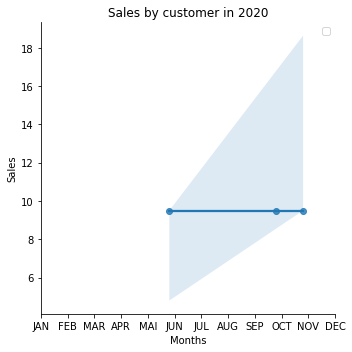

In [195]:
#Linear regression 
#x-as Months from desired year
#y-as Sales 


def get_regression_sales(customer_id, year_regression)
    
    #get the month of each transaction date and store it in new column
    hvc_hvvisitresult["MONTH"] = hvc_hvvisitresult["DATEONLY"].apply(lambda x: x.month)

    #merge
    transactions = hvc_hvvisitresult.merge(hvc_so0,on="SO0_NRID", how ="inner")
    
    #get transactions from desired_year
    transactions = transactions[(transactions["DATEONLY"] >= pd.Timestamp(year=year_regression, day=1, month=1)) & (transactions["DATEONLY"] < pd.Timestamp(year=year_regression + 1, month=1, day=1))]

    #get transactions with succesfull outcome
    transactions = transactions[transactions["HVOUTCOME_NRID"] == 2]
    
    #get transactions from customer with specific id 
    transactions_unique_cust = transactions[transactions["SO0_NRID"] == customer_id ]
    
    # get the total sales for each month for 'private customers'
    sales_unique_cust = transactions_unique_cust.groupby("MONTH")["AMOUNT"].sum().reset_index() 

    print(sales_unique_cust)
    
    sns.lmplot(x="MONTH", y="AMOUNT", data=sales_unique_cust, fit_reg=True)
    plt.xlabel("Months")
    plt.ylabel("Sales")
    plt.title('Sales by customer in 2020')
    plt.xticks(index + bar_width, ('JAN', 'FEB', 'MAR', 'APR', 'MAI', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'))
    plt.legend()
    plt.tight_layout()
    plt.show()


In [188]:
#Test regression 
p

NameError: name 'sales_unique_cust' is not defined

### 2.2.6 Clusters of customers (visualization)


Clustering Multi Vairiable Data  

In [ ]:
# Position 

### 2.2.7 Do customers have different buying patterns during the weekend?

In [ ]:
# join transactions with customers
cust_transactions = pd.merge(hvc_hvvisitresult, hvc_so0, on="SO0_NRID", how="inner")

# get transactions with succesfull outcome
cust_transactions = cust_transactions[cust_transactions["HVOUTCOME_NRID"] == 2 and cust_transactions[""]]

# create boxplot for transaction amounts for weekend
sns.boxplot(x=cust_transactions["AMOUNT"], y=cust_transactions[""] == )
plt.show()


## 3.3 Who are the employees?

## 3.4 What are the routes?

Vraag 1

In [ ]:
hvc_customer_regions = pd.merge(hvc_so0,hvc_hvroutetemplate)

hvc_customer_regions2 = pd.merge(hvc_customer_regions, hvc_hvposition)

hvc_customer_regions2[hvc_customer_regions2["REGION"] == "B02"].describe()

#insert all the different kinds of regions to see the mean and sd


Vraag 2

In [ ]:
#hvc_customer_routes
hvc_customer_routes = pd.merge(hvc_hvroutetemplate, hvc_so0)
hvc_customer_routes[hvc_customer_routes["REGION"] == "C17"]["POSTCODE"].unique()

#certain postal codes are unique for a region


In [ ]:
hvc_customer_regions2[hvc_customer_regions2["REGION"] == "C17"]["POSTCODE"].unique()

In [ ]:
#Which routes belong to which region
    

agg_dict = {"REGION": np.unique}
hvc_customer_regions3_grouped = hvc_customer_routes.groupby("HVROUTETEMPLATE_NRID").agg(agg_dict)

hvc_customer_regions3_grouped


In [ ]:
hvc_customer_routes

Vraag 3

In [ ]:
hvc_routes_depot = pd.merge(hvc_depot, hvc_hvroutetemplate)

hvc_routes_depot

In [ ]:
grouped_routes = hvc_routes_depot.groupby("DEPOT")

for key, item in grouped_routes:
    print(grouped_routes.get_group(key), "\n\n")

Vraag 4

In [ ]:
hvc_employee_route_region = pd.merge(pd.merge(hvc_so0, hvc_hvroutetemplate, on = "HVROUTETEMPLATE_NRID"), hvc_hvvisitresult)



#hvc_employee_route_region[hvc_employee_route_region["AM0_NRID"] == 23186288605042]["REGION"].unique()


agg_dict = {"REGION": np.unique}
hvc_employee_route_region_grouped = hvc_employee_route_region.groupby("AM0_NRID").agg(agg_dict)
hvc_employee_region_name = pd.merge(hvc_employee_route_region_grouped, hvc_am0, on = "AM0_NRID")

hvc_employee_region_name[["NAME", "REGION"]]



Vraag 5

In [ ]:
## Clustering the longitude and latitude

from sklearn.cluster import KMeans
plt.figure(figsize = (10,10))

# initialize the cluster algorithm with 4 classes
kmeans_model = KMeans(n_clusters=4)

# fit the kmeans model onto the data
kmeans_model.fit(hvc_hvposition[["LONG","LAT"]])

# get all the cluster labels
cluster_labels = kmeans_model.labels_

# define color map
color_map = {0: "green", 1: "red", 2: "blue", 3: "yellow"}

# get colors for each cluster label
cluster_colors = [color_map[label] for label in cluster_labels]

# plot data with cluster colors
plt.scatter(hvc_hvposition["LONG"], hvc_hvposition["LAT"], color=cluster_colors)
plt.show()

In [ ]:
#long and lat
#Deinze: 50.590 , 3.3138
#Antwerpen: 51.13, 4.24
#Vilvoorde : 50.56, 4,25
#Aarschot: 50.59, 4.50

#Show the 4 regions in a scatterplotx
plt.figure(figsize = (10,10))

# define color map
color_region = {"C04": "green", "B25": "red", "B02": "blue", "C17":  "yellow"}

# get colors for each cluster label
cluster_region = [color_region[label] for label in hvc_customer_regions2["REGION"]]

# plot data with cluster colors
plt.scatter(hvc_customer_regions2["LONG"], hvc_customer_regions2["LAT"], color=cluster_region, s = 7)
#plt.savefig("./data/fig_region.pdf")


# define color map
color_depot = {"Deinze": "black", "Antwerpen": "black", "Vilvoorde": "black", "Aarschot":  "black"}

# get colors for each cluster label
cluster_depot = [color_depot[label] for label in data_depot["DEPOT"]] #in de juiste dataframe kijken om het depot te vinden

# plot data with cluster colors
plt.scatter(data_depot["Long"], data_depot["Lat"], color=cluster_depot, s = 100)
plt.savefig("./data/fig_depot.pdf")
plt.show()

In [ ]:
hvc_customer_regions2

In [ ]:
hvc_depot_route = pd.merge(hvc_depot, hvc_hvroutetemplate)
hvc_depot_route

In [ ]:
#group the depot to see which regions are present in a depot

agg_dict_depot = {"REGION": np.unique}
hvc_depot_route_grouped = hvc_depot_route.groupby("DEPOT").agg(agg_dict)

hvc_depot_route_grouped#[["NAME", "REGION"]]


In [ ]:


# assign data of lists.  
data = {'DEPOT': ['Deinze', 'Antwerpen', 'Vilvoorde', 'Aarschot'], 'Long': [3.3138, 4.24, 4.25, 4.50], 'Lat' :[50.590,51.13,50.56,50.59]}  
  
# Create DataFrame  
data_depot = pd.DataFrame(data)  
  
# Print the output.  
print(data_depot)  

#dataframe_depots = pd.DataFrame["Deinze" : ""]

In [ ]:
# define a route id
route_id = 219020601.0

for routeid in cust_pos["HVROUTETEMPLATE_NRID"]
# join customer info with customer positions
cust_pos = pd.merge(hvc_so0, hvc_hvposition, on="SO0_NRID", how="inner")
for routeid in cust_pos["HVROUTETEMPLATE_NRID"]

# get all the customers belonging to that route
all_cust_route = cust_pos[cust_pos["HVROUTETEMPLATE_NRID"] == 219020601.0]

# plot the positions of all customers 
plt.figure(figsize=(10, 10))
plt.scatter(hvc_hvposition["LONG"], hvc_hvposition["LAT"], color="blue", s = 7)
# plot the positions of the customers belonging to the specified route
plt.scatter(all_cust_route["LONG"], all_cust_route["LAT"], color="orange", label="customer of route %s" %route_id, s = 7)
# define legend to add label to figure
plt.legend(loc="lower left")
plt.show()

